**TASTE SENSE PREDICTION (USING KNN - N.Nandhini)**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/FlavorSense.csv')

In [39]:
df = df.dropna()

In [40]:
encoders = {}
for col in ["sleep_cycle", "exercise_habits", "climate_zone",
            "historical_cuisine_exposure", "preferred_taste"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [41]:
X = df[["age", "sleep_cycle", "exercise_habits",
        "climate_zone", "historical_cuisine_exposure"]]
y = df["preferred_taste"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn.predict(X_test)
print("Model accuracy:", accuracy_score(y_test, y_pred))

Model accuracy: 0.8533916849015317


In [45]:
print("\n--- User Input ---")
age = float(input("Enter age: "))
sleep_cycle_txt = input("Enter sleep cycle (e.g., Night Owl, Early Bird, Irregular): ")
exercise_txt = input("Enter exercise habits (e.g., Light, Moderate, Heavy): ")
climate_txt = input("Enter climate zone (e.g., Temperate, Cold, Dry): ")
history_txt = input("Enter historical cuisine exposure (e.g., Asian, Mediterranean, Mixed): ")


--- User Input ---
Enter age: 18
Enter sleep cycle (e.g., Night Owl, Early Bird, Irregular): Night Owl
Enter exercise habits (e.g., Light, Moderate, Heavy): Moderate
Enter climate zone (e.g., Temperate, Cold, Dry): Temperate
Enter historical cuisine exposure (e.g., Asian, Mediterranean, Mixed): Asian


In [46]:
sleep_enc = encoders["sleep_cycle"].transform([sleep_cycle_txt])[0]
exercise_enc = encoders["exercise_habits"].transform([exercise_txt])[0]
climate_enc = encoders["climate_zone"].transform([climate_txt])[0]
history_enc = encoders["historical_cuisine_exposure"].transform([history_txt])[0]

In [47]:
user_features = [[age, sleep_enc, exercise_enc, climate_enc, history_enc]]
pred_encoded = knn.predict(user_features)[0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [48]:
pred_taste = encoders["preferred_taste"].inverse_transform([pred_encoded])[0]
print("\nPredicted preferred taste:", pred_taste)


Predicted preferred taste: Sweet


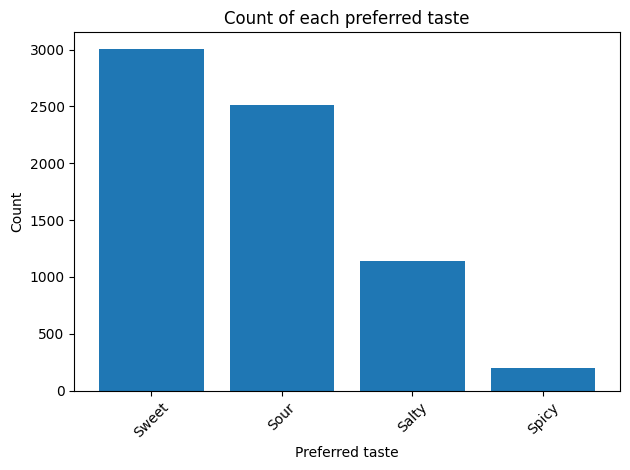

In [49]:
taste_counts = df["preferred_taste"].value_counts()
labels = encoders["preferred_taste"].inverse_transform(taste_counts.index)

plt.bar(labels, taste_counts.values)
plt.xlabel("Preferred taste")
plt.ylabel("Count")
plt.title("Count of each preferred taste")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()